In [1]:
import pandas as pd
import numpy as np

from util import CombinedPreprocessor
from cross_validation import RandomCV, GroupKFoldCV, SpatialPlusCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from IPython.display import display
np.random.seed(41)

### 2020

In [4]:
indices_6182020 = pd.read_csv("Datasets/Indices_Combined/2020/June_18_2020_New.csv")
indices_6232020 = pd.read_csv("Datasets/Indices_Combined/2020/June_23_2020_New.csv")
indices_6302020 = pd.read_csv("Datasets/Indices_Combined/2020/June_30_2020_New.csv")
indices_7062020 = pd.read_csv("Datasets/Indices_Combined/2020/July_6_2020_New.csv")

processor = CombinedPreprocessor()

temp = pd.concat([indices_6232020, indices_6302020])

X_train, X_test, y_train, y_test, train_coordinates, test_coordinates = processor.transform(indices_6182020, temp, indices_7062020)

random_validator = RandomCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
gkf_validator = GroupKFoldCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
sp_validator = SpatialPlusCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})

rndm_results = random_validator.results(X_train, X_test, y_train, y_test)
gkf_results = gkf_validator.results(X_train, X_test, y_train, y_test)
sp_results = sp_validator.results(X_train, X_test, y_train, y_test, train_coordinates)

display(rndm_results, gkf_results, sp_results)

,Random,CV_METHOD,RMSE_AVG,R2_AVG,RMSE STD,R2 STD
0,LR,RNDM_CV_LOFO,0.170573,0.358360,0.00281,0.022690
1,LR,RNDM_TEST_LOFO,0.216222,-0.016128,0.00000,0.000000
2,RF,RNDM_CV_LOFO,0.100944,0.775326,0.00393,0.013079
3,RF,RNDM_TEST_LOFO,0.175674,0.329245,0.00000,0.000000
4,XGB,RNDM_CV_LOFO,0.105338,0.755292,0.00323,0.012352
5,XGB,RNDM_TEST_LOFO,0.163720,0.417424,0.00000,0.000000


,GroupKFold,CV_METHOD,RMSE_AVG,R2_AVG,RMSE STD,R2 STD
0,LR,GKF_CV_LOFO,0.461045,-4.897560,0.239526,5.898129
1,LR,GKF_TEST_LOFO,0.216222,-0.016128,0.000000,0.000000
2,RF,GKF_CV_LOFO,0.216723,-0.212160,0.098237,1.045463
3,RF,GKF_TEST_LOFO,0.175674,0.329245,0.000000,0.000000
4,XGB,GKF_CV_LOFO,0.233039,-0.367415,0.097131,1.112856
5,XGB,GKF_TEST_LOFO,0.163720,0.417424,0.000000,0.000000


,Spatial+,CV_METHOD,RMSE_AVG,R2_AVG,RMSE STD,R2 STD
0,LR,SP_CV_LOFO,0.501069,-6.965597,0.335983,8.513580
1,LR,SP_TEST_LOFO,0.216222,-0.016128,0.000000,0.000000
2,RF,SP_CV_LOFO,0.138410,0.537167,0.039970,0.248151
3,RF,SP_TEST_LOFO,0.175674,0.329245,0.000000,0.000000
4,XGB,SP_CV_LOFO,0.149319,0.469604,0.033326,0.215352
5,XGB,SP_TEST_LOFO,0.163720,0.417424,0.000000,0.000000


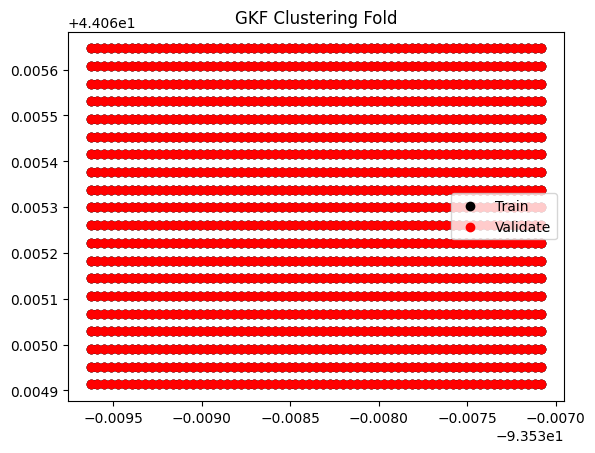

Train Samples   :  2680
Validate Samples:  1340
LR Fold RMSE Scores:  [0.8558284  0.42533436 0.21867896 0.34434007]
LR Fold R2 Scores  :  [-14.91927462  -3.26835715  -0.05110794  -1.35150034]
RF Fold RMSE Scores:  [0.36786374 0.13080926 0.12820806 0.24001059]
RF Fold R2 Scores  :  [-1.94119529  0.5962832   0.63870334 -0.14243297]


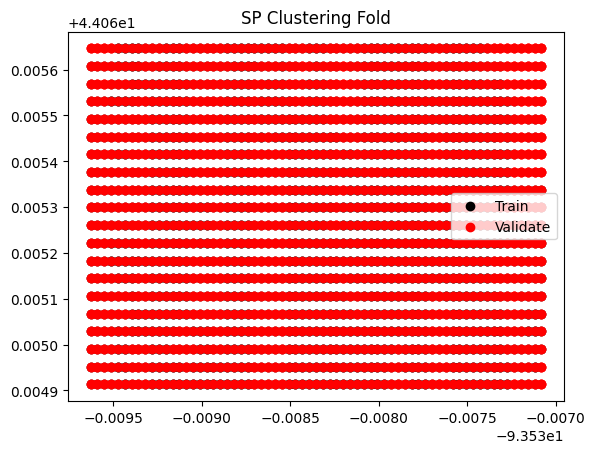

Train Samples   :  2106
Validate Samples:  1914
LR Fold CV RMSE Scores:  [1.02811026 0.21861253 0.55776396 0.19978786]
LR Fold CV R2 Scores  :  [-20.84212644  -0.12744214  -7.04059543   0.14777755]
RF Fold CV RMSE Scores:  [0.20512349 0.1163941  0.13116571 0.10095838]
RF Fold CV R2 Scores  :  [0.13054659 0.6804005  0.55534014 0.78237965]


In [7]:
gkf_validator.display_fold(0, train_coordinates)
sp_validator.display_fold(0)

### 2021

In [4]:
indices_6162021 = pd.read_csv("Datasets/Indices_Combined/2021/June_16_2021.csv")
indices_6222021 = pd.read_csv("Datasets/Indices_Combined/2021/June_22_2021.csv")
indices_6302021 = pd.read_csv("Datasets/Indices_Combined/2021/June_30_2021.csv")
indices_7122021 = pd.read_csv("Datasets/Indices_Combined/2021/July_12_2021.csv")

processor1 = CombinedPreprocessor()

temp = pd.concat([indices_6222021, indices_6302021])

X_train1, X_test1, y_train1, y_test1, train_coordinates1, test_coordinates1 = processor1.transform(indices_6162021, temp, indices_7122021)

random_validator1 = RandomCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
gkf_validator1 = GroupKFoldCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
sp_validator1 = SpatialPlusCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})

rndm_results1 = random_validator1.results(X_train1, X_test1, y_train1, y_test1)
gkf_results1 = gkf_validator1.results(X_train1, X_test1, y_train1, y_test1)
sp_results1 = sp_validator1.results(X_train1, X_test1, y_train1, y_test1)

display(rndm_results1, gkf_results1, sp_results1)

,Random,CV_METHOD,RMSE_AVG,R2_AVG,RMSE STD,R2 STD
0,LR,RNDM_CV_LOFO,0.132316,0.411290,0.001975,0.022812
1,LR,RNDM_TEST_LOFO,0.270047,-1.431574,0.000000,0.000000
2,RF,RNDM_CV_LOFO,0.076704,0.801835,0.002407,0.015785
3,RF,RNDM_TEST_LOFO,0.152788,0.221632,0.000000,0.000000
4,XGB,RNDM_CV_LOFO,0.080732,0.780626,0.001881,0.013920
5,XGB,RNDM_TEST_LOFO,0.165177,0.090275,0.000000,0.000000


,GroupKFold,CV_METHOD,RMSE_AVG,R2_AVG,RMSE STD,R2 STD
0,LR,GKF_CV_LOFO,0.180347,-0.259954,0.061051,0.874689
1,LR,GKF_TEST_LOFO,0.270047,-1.431574,0.000000,0.000000
2,RF,GKF_CV_LOFO,0.110405,0.553595,0.026247,0.214683
3,RF,GKF_TEST_LOFO,0.152788,0.221632,0.000000,0.000000
4,XGB,GKF_CV_LOFO,0.112272,0.541129,0.025556,0.211179
5,XGB,GKF_TEST_LOFO,0.165177,0.090275,0.000000,0.000000


,Spatial+,CV_METHOD,RMSE_AVG,R2_AVG,RMSE STD,R2 STD
0,LR,SP_CV_LOFO,0.151624,0.184878,0.026341,0.358526
1,LR,SP_TEST_LOFO,0.270047,-1.431574,0.000000,0.000000
2,RF,SP_CV_LOFO,0.108100,0.565564,0.027944,0.255706
3,RF,SP_TEST_LOFO,0.152788,0.221632,0.000000,0.000000
4,XGB,SP_CV_LOFO,0.115773,0.476245,0.038692,0.394009
5,XGB,SP_TEST_LOFO,0.165177,0.090275,0.000000,0.000000


### 2022

In [5]:
indices_6152022 = pd.read_csv("Datasets/Indices_Combined/2022/June_15_2022.csv")
indices_6232022 = pd.read_csv("Datasets/Indices_Combined/2022/June_23_2022.csv")
indices_6282022 = pd.read_csv("Datasets/Indices_Combined/2022/June_28_2022.csv")
indices_7132022 = pd.read_csv("Datasets/Indices_Combined/2022/July_13_2022.csv")

processor2 = CombinedPreprocessor()

temp = pd.concat([indices_6232022, indices_6282022])

X_train2, X_test2, y_train2, y_test2, train_coordinates2, test_coordinates2 = processor2.transform(indices_6152022, temp, indices_7132022)

random_validator2 = RandomCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
gkf_validator2 = GroupKFoldCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
sp_validator2 = SpatialPlusCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})

rndm_results2 = random_validator2.results(X_train2, X_test2, y_train2, y_test2)
gkf_results2 = gkf_validator2.results(X_train2, X_test2, y_train2, y_test2)
sp_results2 = sp_validator2.results(X_train2, X_test2, y_train2, y_test2)

display(rndm_results2, gkf_results2, sp_results2)

,Random,CV_METHOD,RMSE_AVG,R2_AVG,RMSE STD,R2 STD
0,LR,RNDM_CV_LOFO,0.138099,0.139607,0.015681,0.224183
1,LR,RNDM_TEST_LOFO,0.128374,0.277088,0.000000,0.000000
2,RF,RNDM_CV_LOFO,0.087786,0.657689,0.002784,0.017476
3,RF,RNDM_TEST_LOFO,0.207496,-0.888652,0.000000,0.000000
4,XGB,RNDM_CV_LOFO,0.096298,0.588441,0.003291,0.014300
5,XGB,RNDM_TEST_LOFO,0.117664,0.392680,0.000000,0.000000


,GroupKFold,CV_METHOD,RMSE_AVG,R2_AVG,RMSE STD,R2 STD
0,LR,GKF_CV_LOFO,0.177064,-0.443829,0.027474,0.429380
1,LR,GKF_TEST_LOFO,0.128374,0.277088,0.000000,0.000000
2,RF,GKF_CV_LOFO,0.119987,0.324117,0.025005,0.278868
3,RF,GKF_TEST_LOFO,0.207496,-0.888652,0.000000,0.000000
4,XGB,GKF_CV_LOFO,0.111061,0.445776,0.010670,0.063961
5,XGB,GKF_TEST_LOFO,0.117664,0.392680,0.000000,0.000000


,Spatial+,CV_METHOD,RMSE_AVG,R2_AVG,RMSE STD,R2 STD
0,LR,SP_CV_LOFO,0.413042,-10.372649,0.260671,10.188411
1,LR,SP_TEST_LOFO,0.128374,0.277088,0.000000,0.000000
2,RF,SP_CV_LOFO,0.126625,0.150959,0.025679,0.387603
3,RF,SP_TEST_LOFO,0.207496,-0.888652,0.000000,0.000000
4,XGB,SP_CV_LOFO,0.132381,0.078046,0.021077,0.360236
5,XGB,SP_TEST_LOFO,0.117664,0.392680,0.000000,0.000000
